# Convocatoria de septiembre: Mundial'18
**Fecha:** 05/09/2018

Antes de empezar, ejecutaremos la siguiente celda con las importaciones necesarias para poder realizar el ejercicio:

In [4]:
import csv
from datetime import datetime, date
from matplotlib import pylab as plt
from collections import namedtuple

## 1. Carga de datos (2 puntos)

Tomaremos los datos de un fichero de entrada llamado <code>partidos.csv</code> con datos de los 64 partidos disputados durante el Mundial de Fútbol de 2018. El fichero se encuentra en la carpeta <code>./csv</code>. Cada línea del fichero de entrada contiene cinco datos relativos un partido:
- fecha: día en el que se jugó el partido
- local: selección que jugó como local
- vistitante: selección que jugó como visitante
- goles_local: goles marcados por la selección local
- goles_visitante: goles marcados por la selección visitante

He aquí un fragmento con las primeras líneas del fichero de entrada:
<pre>
    14/06/2018,Rusia,Arabia Saudí,5,0
    15/06/2018,Egipto,Uruguay,0,1
    15/06/2018,Marruecos,Irán,0,1
    15/06/2018,Portugal,España,3,3
    16/06/2018,Francia,Australia,2,1
    16/06/2018,Argentina,Islandia,1,1
</pre>

La primera función que implementaremos será la de lectura. Será la encargada de leer los datos del fichero de entrada y cargarlos en una lista de tuplas:

In [5]:
def lee_partidos(fichero):
    ''' Lee el fichero de entrada y devuelve una lista de tuplas
    
    Cada línea del fichero de entrada contiene cinco datos relativos un partido:
    - fecha: día en el que se jugó el partido
    - local: selección que jugó como local
    - vistitante: selección que jugó como visitante
    - goles_local: goles marcados por la selección local
    - goles_visitante: goles marcados por la selección visitante
    
    Hay que transformar ciertos elementos de la entrada en valores numéricos o de tipo fecha
    para que puedan ser procesados posteriormente. Para convertir una cadena de texto del
    estilo de '14/06/2018' en una fecha, se podrá usar esta expresión:
        fecha = datetime.strptime(fecha_en_cadena, '%d/%m/%Y').date()

    '''
    partidos = []
    with open(fichero, encoding='utf-8') as f:
        lector = csv.reader(f)
        for fecha, local, visitante, goles_local, goles_visitante in lector:
            fecha = datetime.strptime(fecha, '%d/%m/%Y').date()
            goles_local = int(goles_local)
            goles_visitante = int(goles_visitante)
            partidos.append((fecha, local, visitante, goles_local, goles_visitante))
    return partidos

In [9]:
Partido = namedtuple('Partido', 'fecha local visitante goles_local goles_visitante')

def lee_partidos(fichero):
    ''' Lee el fichero de entrada y devuelve una lista de tuplas
   
    Cada línea del fichero de entrada contiene cinco datos relativos un partido:
    - fecha: día en el que se jugó el partido
    - local: selección que jugó como local
    - vistitante: selección que jugó como visitante
    - goles_local: goles marcados por la selección local
    - goles_visitante: goles marcados por la selección visitante
   
    Hay que transformar ciertos elementos de la entrada en valores numéricos o de tipo fecha
    para que puedan ser procesados posteriormente. Para convertir una cadena de texto del
    estilo de '14/06/2018' en una fecha, se podrá usar esta expresión:
        fecha = datetime.strptime(fecha_en_cadena, '%d/%m/%Y').date()

    '''
   
    partidos = []
    with open(fichero, 'r', encoding='utf-8') as f:
        lector = csv.reader(f, delimiter=',')
        next(lector)
        partidos = [Partido(datetime.strptime(fecha, '%d/%m/%Y').date(), local, visitante, int(goles_local), int(goles_visitante)) 
                     for fecha, local, visitante, goles_local, goles_visitante in lector]
    return partidos

In [10]:
# Test de la función lee_resultados
partidos = lee_partidos('partidos.csv')

# La salida esperada de la siguiente instrucción es: 
#    64 [(datetime.date(2018, 6, 14), 'Rusia', 'Arabia Saudí', 5, 0), (datetime.date(2018, 6, 15), 'Egipto', 'Uruguay', 0, 1)]
print(len(partidos), partidos[:2])

63 [Partido(fecha=datetime.date(2018, 6, 15), local='Egipto', visitante='Uruguay', goles_local=0, goles_visitante=1), Partido(fecha=datetime.date(2018, 6, 15), local='Marruecos', visitante='Irán', goles_local=0, goles_visitante=1)]


## 2. Consulta y filtrado (6 puntos)

Una vez que hemos cargado los datos en una estructura en memoria ya podemos empezar a procesarlos. En esta sección implementaremos algunas funciones de consulta y filtrado que nos permitirán trabajar con ellos.

La primera función que implementaremos se llama <code>media_goles</code>. La función toma una lista de partidos y calcula la media de goles marcados en ellos:

In [ ]:
def media_goles(partidos):
    ''' Calcula la media de goles

    Toma como entrada una lista de partidos y calcula la media de goles marcados en ellos
    '''
    goles = sum((goles_local+goles_visitante for _,_,_,goles_local,goles_visitante in partidos))
    return goles / len(partidos)

In [ ]:
# Test de la función media_goles
media = media_goles(partidos)

# La salida esperada de la siguiente instrucción es: 
#   2.640625
print(media)

La segunda función se llama <code>filtra_por_fechas</code>. Toma una lista de partidos y dos fechas, y selecciona solo los partidos entre ambas fechas, inclusive:

In [ ]:
def filtra_por_fechas(partidos, inicio, fin):
    ''' Selecciona partidos por fechas

    Toma una lista de partidos y dos fechas (inicio y fin) y selecciona solo los partidos entre ambas fechas, inclusive:
    '''
    filtrados = [p for p in partidos if p[0]>=inicio and p[0]<=fin]
    return filtrados

In [ ]:
# Test de la función filtra_por_fechas
partidos_fase_final = filtra_por_fechas(partidos, date(2018, 6, 30), date(2018, 7, 15))

# La salida esperada de la siguiente instrucción es: 
# 16 [(datetime.date(2018, 6, 30), 'Francia', 'Argentina', 4, 3), (datetime.date(2018, 6, 30), 'Uruguay', 'Portugal', 2, 1)]
print(len(partidos_fase_final), partidos_fase_final[:2])

La siguiente función se llama <code>calcula_selecciones</code>. Toma como entrada una lista de partidos, y produce como salida un conjunto con todas las selecciones participantes en esos partidos.

In [ ]:
def calcula_selecciones(partidos):
    ''' Calcula las selecciones participantes
    
    Toma como entrada una lista de partidos, y produce como salida un conjunto con todas
    las selecciones participantes en esos partidos.
    '''
    locales = [local for _,local,_,_,_ in partidos]
    visitantes = [visitante for _,_,visitante,_,_ in partidos]
    return set(locales+visitantes)

In [ ]:
# Test de la función calcula_selecciones
selecciones = calcula_selecciones(partidos)

# La salida esperada de la siguiente instrucción es la siguiente. Los conjuntos no tienen orden, por lo que 
# los nombres de las selecciones no tienen que aparecer siempre en el mismo orden:
# 32 {'Colombia', 'Uruguay', 'Panamá', 'Arabia Saudí', 'Argentina', 'Japón', 'Bélgica', 'Australia', 'Rusia', 
#     'Alemania', 'Serbia', 'Brasil', 'Costa Rica', 'Corea del Sur', 'Inglaterra', 'Nigeria', 'Islandia', 
#     'Egipto', 'Marruecos', 'Croacia', 'Suiza', 'Irán', 'Senegal', 'Perú', 'España', 'Suecia', 'Portugal', 
#     'Túnez', 'Polonia', 'Francia', 'Dinamarca', 'México'}
print(len(selecciones), selecciones)

La última función de consulta se llama <code>resultados_por_seleccion</code>. Toma como entrada una lista de partidos y produce como salida un diccionario cuyas claves son los nombres de las selecciones participantes en esos partidos y los valores son listas de resultados para cada selección.

In [ ]:
def resultados_por_seleccion(partidos):
    ''' Crea un diccionario con los resultados que ha obtenido cada selección
    
    Toma como entrada una lista de partidos y produce como salida un diccionario
    cuyas claves son los nombres de las selecciones participantes en esos partidos y
    los valores son listas de resultados para cada selección. Cada resultado se
    representa con una tupla de tres valores:
    - rival: selección con la que se enfrentó
    - goles_favor: goles a favor
    - goles_contra: goles en contra
    '''
    resultados = dict()
    selecciones = calcula_selecciones(partidos)
    for seleccion in selecciones:
        resultados_local = [(rival,goles_local,goles_visitante) for 
                             _,s,rival,goles_local,goles_visitante in partidos if s == seleccion]
        resultados_visitante = [(rival,goles_visitante,goles_local) for 
                                 _,rival,s,goles_local,goles_visitante in partidos if s == seleccion]
        resultados[seleccion] = resultados_local + resultados_visitante
    return resultados

In [ ]:
# Test de la función resultados_por_seleccion
resultados = resultados_por_seleccion(partidos)

# La salida de las siguientes instrucciones es:
# [('Marruecos', 2, 2), ('Rusia', 1, 1), ('Portugal', 3, 3), ('Irán', 1, 0)]
# [('Australia', 2, 1), ('Perú', 1, 0), ('Argentina', 4, 3), ('Bélgica', 1, 0), ('Croacia', 4, 2), ('Dinamarca', 0, 0), ('Uruguay', 2, 0)]
print(resultados['España'])
print(resultados['Francia'])

## 3. Visualización (2 puntos)

La función de visualización que implementaremos será <code>muestra_puntos_por_seleccion</code>. Toma como entrada un diccionario de resultados (como el producido por la función <code>resultados_por_seleccion</code>, y genera un diagrama de barras en el que se muestran (ordenados de mayor a menor) el número de puntos obtenidos por cada selección.

In [ ]:
def muestra_puntos_por_seleccion(resultados):
    ''' Genera una diagrama de barras con los puntos obtenidos por cada selección
        
        Toma como entrada un diccionario de resultados (como el producido por la función
        resultados_por_seleccion) y genera un diagrama de barras en el que se muestran 
        (ordenados de mayor a menor) el número de puntos obtenidos por cada selección.
        Un partido ganado se corresponde con 3 puntos y uno empatado con 1.
    
        Se usarán las siguientes instrucciones para generar el diagrama de barras:
            selecciones = sorted(puntos_por_seleccion, key=puntos_por_seleccion.get, reverse=True)
            puntos = [puntos_por_seleccion[s] for s in selecciones]
            plt.bar(range(len(selecciones)), puntos, tick_label=selecciones)
            plt.xticks(rotation=85)
            plt.show()
        
        El ejercicio consiste en calcular 'puntos_por_seleccion' que es un diccionario en 
        el que se asocia a cada selección el número de puntos que ha obtenido en los partidos
        que ha disputado.
    '''
    selecciones = list(resultados.keys())
    puntos_por_seleccion = dict()
    for seleccion in selecciones:
        victorias = sum(3 for _,favor,contra  in resultados[seleccion] if favor>contra)
        empates = sum(1 for _,favor,contra  in resultados[seleccion] if favor==contra)
        puntos_por_seleccion[seleccion] = (victorias+empates)
    selecciones = sorted(puntos_por_seleccion, key=puntos_por_seleccion.get, reverse=True)
    puntos = [puntos_por_seleccion[s] for s in selecciones]
    plt.bar(range(len(selecciones)), puntos, tick_label=selecciones)
    plt.xticks(rotation=85)
    plt.show()

La salida de la celda de test debería ser la siguiente:
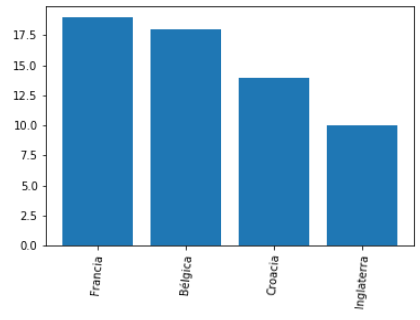

In [ ]:
# Test de la función muestra_puntos_por_seleccion

resultados_semifinalistas = {
    'Croacia': [('Nigeria', 2, 0), ('Dinamarca', 1, 1), ('Inglaterra', 2, 1), ('Argentina', 3, 0), ('Islandia', 2, 1), ('Rusia', 2, 2), ('Francia', 2, 4)],
    'Francia': [('Australia', 2, 1), ('Perú', 1, 0), ('Argentina', 4, 3), ('Bélgica', 1, 0), ('Croacia', 4, 2), ('Dinamarca', 0, 0), ('Uruguay', 2, 0)],
    'Bélgica': [('Panamá', 3, 0), ('Túnez', 5, 2), ('Japón', 3, 2), ('Inglaterra', 2, 0), ('Inglaterra', 1, 0), ('Brasil', 2, 1), ('Francia', 0, 1)],
    'Inglaterra': [('Panamá', 6, 1), ('Bélgica', 0, 1), ('Túnez', 2, 1), ('Colombia', 1, 1), ('Suecia', 2, 0), ('Croacia', 1, 2), ('Bélgica', 0, 2)]
}

muestra_puntos_por_seleccion(resultados_semifinalistas)
#muestra_puntos_por_seleccion(resultados)

Para todos los equipos participantes en el mundial (instrucción comentada en la celda de test) obtendríamos la siguiente gráfica:
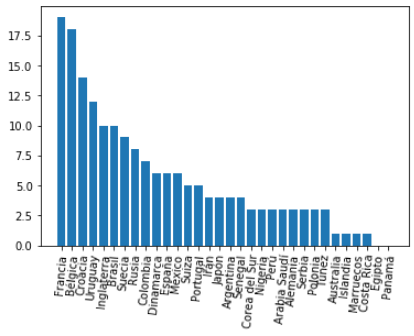    